In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [136]:
bike = pd.read_csv(r"C:\Users\mailk\OneDrive\Desktop\AI and ML\Linear Regression\Bike_Share\bike_share.csv")

In [235]:
bike.head(10)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1.0,0.0,0.0,1.0,9.84,14.395,81.0,0.0000,3.0,13.0,16.0
1,1.0,0.0,0.0,1.0,9.02,13.635,80.0,0.0000,8.0,32.0,40.0
2,1.0,0.0,0.0,1.0,9.02,13.635,80.0,0.0000,5.0,27.0,32.0
3,1.0,0.0,0.0,1.0,9.84,14.395,75.0,0.0000,3.0,10.0,13.0
4,1.0,0.0,0.0,1.0,9.84,14.395,75.0,0.0000,0.0,1.0,1.0
5,1.0,0.0,0.0,2.0,9.84,12.880,75.0,6.0032,0.0,1.0,1.0
6,1.0,0.0,0.0,1.0,9.02,13.635,80.0,0.0000,2.0,0.0,2.0
7,1.0,0.0,0.0,1.0,8.20,12.880,86.0,0.0000,1.0,2.0,3.0
8,1.0,0.0,0.0,1.0,9.84,14.395,75.0,0.0000,1.0,7.0,8.0
9,1.0,0.0,0.0,1.0,13.12,17.425,76.0,0.0000,8.0,6.0,14.0


In [4]:
bike.shape

(10886, 11)

Text(0.5, 1.0, 'temp Vs reg_cnt')

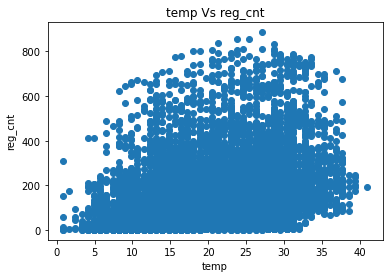

In [5]:
plt.scatter(bike['temp'], bike['registered'])
plt.xlabel('temp')
plt.ylabel('reg_cnt')
plt.title('temp Vs reg_cnt')

In [6]:
bike.temp.describe()

count    10886.00000
mean        20.23086
std          7.79159
min          0.82000
25%         13.94000
50%         20.50000
75%         26.24000
max         41.00000
Name: temp, dtype: float64

In [7]:
bike.isna().sum()

season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [8]:
bike.holiday.value_counts()

0    10575
1      311
Name: holiday, dtype: int64

In [9]:
bike.workingday.value_counts()

1    7412
0    3474
Name: workingday, dtype: int64

In [10]:
a = (1,2,3,4,5,6,7)

In [11]:
a

(1, 2, 3, 4, 5, 6, 7)

In [12]:
b = pd.DataFrame(a)

In [13]:
a

(1, 2, 3, 4, 5, 6, 7)

In [14]:
b.quantile(.50)

0    4.0
Name: 0.5, dtype: float64

In [118]:
filt = (bike.registered > 0) & (bike.temp < 5)

In [120]:
bike[filt]['registered'].agg({'mean', 'median','min', 'max'})

median    119.000000
max       886.000000
min         1.000000
mean      155.766811
Name: registered, dtype: float64

In [17]:
bike.registered.value_counts().sort_values

<bound method Series.sort_values of 3      195
4      190
5      177
6      155
2      150
      ... 
577      1
561      1
537      1
521      1
839      1
Name: registered, Length: 731, dtype: int64>

In [41]:
for col_name in bike.select_dtypes(include=np.number).columns[:-1]:
    print(col_name)
    q1 = bike[col_name].quantile(0.25)
    q3 = bike[col_name].quantile(0.75)
    iqr = q3 - q1
    
    low = q1-1.5*iqr
    high = q3+1.5*iqr
   # print("Outliers = ",bike.loc[(bike[col_name] < low) | (bike[col_name] > high), col_name])

season
holiday
workingday
weather
temp
atemp
humidity
windspeed
casual
registered


#### Not considering outliers for this exercise

In [20]:
bike.head(10)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
5,1,0,0,2,9.84,12.880,75,6.0032,0,1,1
6,1,0,0,1,9.02,13.635,80,0.0000,2,0,2
7,1,0,0,1,8.20,12.880,86,0.0000,1,2,3
8,1,0,0,1,9.84,14.395,75,0.0000,1,7,8
9,1,0,0,1,13.12,17.425,76,0.0000,8,6,14


In [21]:
model = LinearRegression()

In [22]:
model.fit(bike[['temp']],bike['registered'])

LinearRegression()

In [23]:
m = model.coef_

In [24]:
c = model.intercept_

In [25]:
print(m,c)

[6.175466] 30.617190185186118


In [26]:
y = m* 9.84 + c

In [27]:
y

array([91.3837756])

In [28]:
predict_reg = model.predict(bike[['temp']])

In [29]:
actual_reg = bike['registered']

In [30]:
actual_reg

0         13
1         32
2         27
3         10
4          1
        ... 
10881    329
10882    231
10883    164
10884    117
10885     84
Name: registered, Length: 10886, dtype: int64

In [31]:
predict_reg

array([ 91.3837756 ,  86.31989348,  86.31989348, ..., 116.70318619,
       116.70318619, 111.63930408])

## Error

In [32]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error,r2_score

In [33]:
mean_squared_error(actual_reg,predict_reg) ##MSE

20495.689943766178

In [34]:
mean_absolute_error(actual_reg,predict_reg) ## MAE

105.7257425543564

In [35]:
mean_absolute_percentage_error(actual_reg,predict_reg) ##MAPE

732591326317961.5

In [36]:
r2_score(actual_reg,predict_reg) ##RSquare

0.10148766065580495

In [37]:
mean_squared_error(actual_reg,predict_reg, squared=False) ##RMSE

143.16315847230453

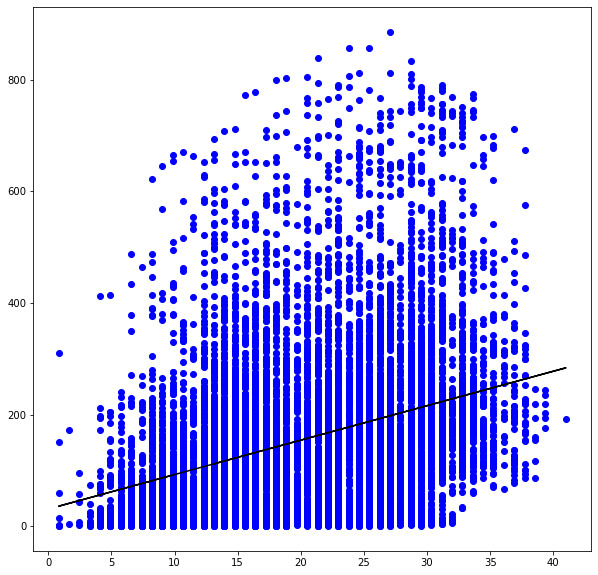

In [38]:
plt.figure(figsize=(10,10))
plt.scatter(bike['temp'], bike['registered'], color='b')
plt.plot(bike['temp'], predict_reg, color='black')

# Trying to remove outliers for each category

In [43]:
bike.head(10)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
5,1,0,0,2,9.84,12.880,75,6.0032,0,1,1
6,1,0,0,1,9.02,13.635,80,0.0000,2,0,2
7,1,0,0,1,8.20,12.880,86,0.0000,1,2,3
8,1,0,0,1,9.84,14.395,75,0.0000,1,7,8
9,1,0,0,1,13.12,17.425,76,0.0000,8,6,14


In [58]:
filt = (bike.registered > 0) & (bike.temp < 5)

In [59]:
bike[filt]['registered'].agg({'mean', 'median','min', 'max'})

median     19.5000
max       414.0000
min         1.0000
mean       52.1875
Name: registered, dtype: float64

<AxesSubplot:title={'center':'registered'}, xlabel='temp'>

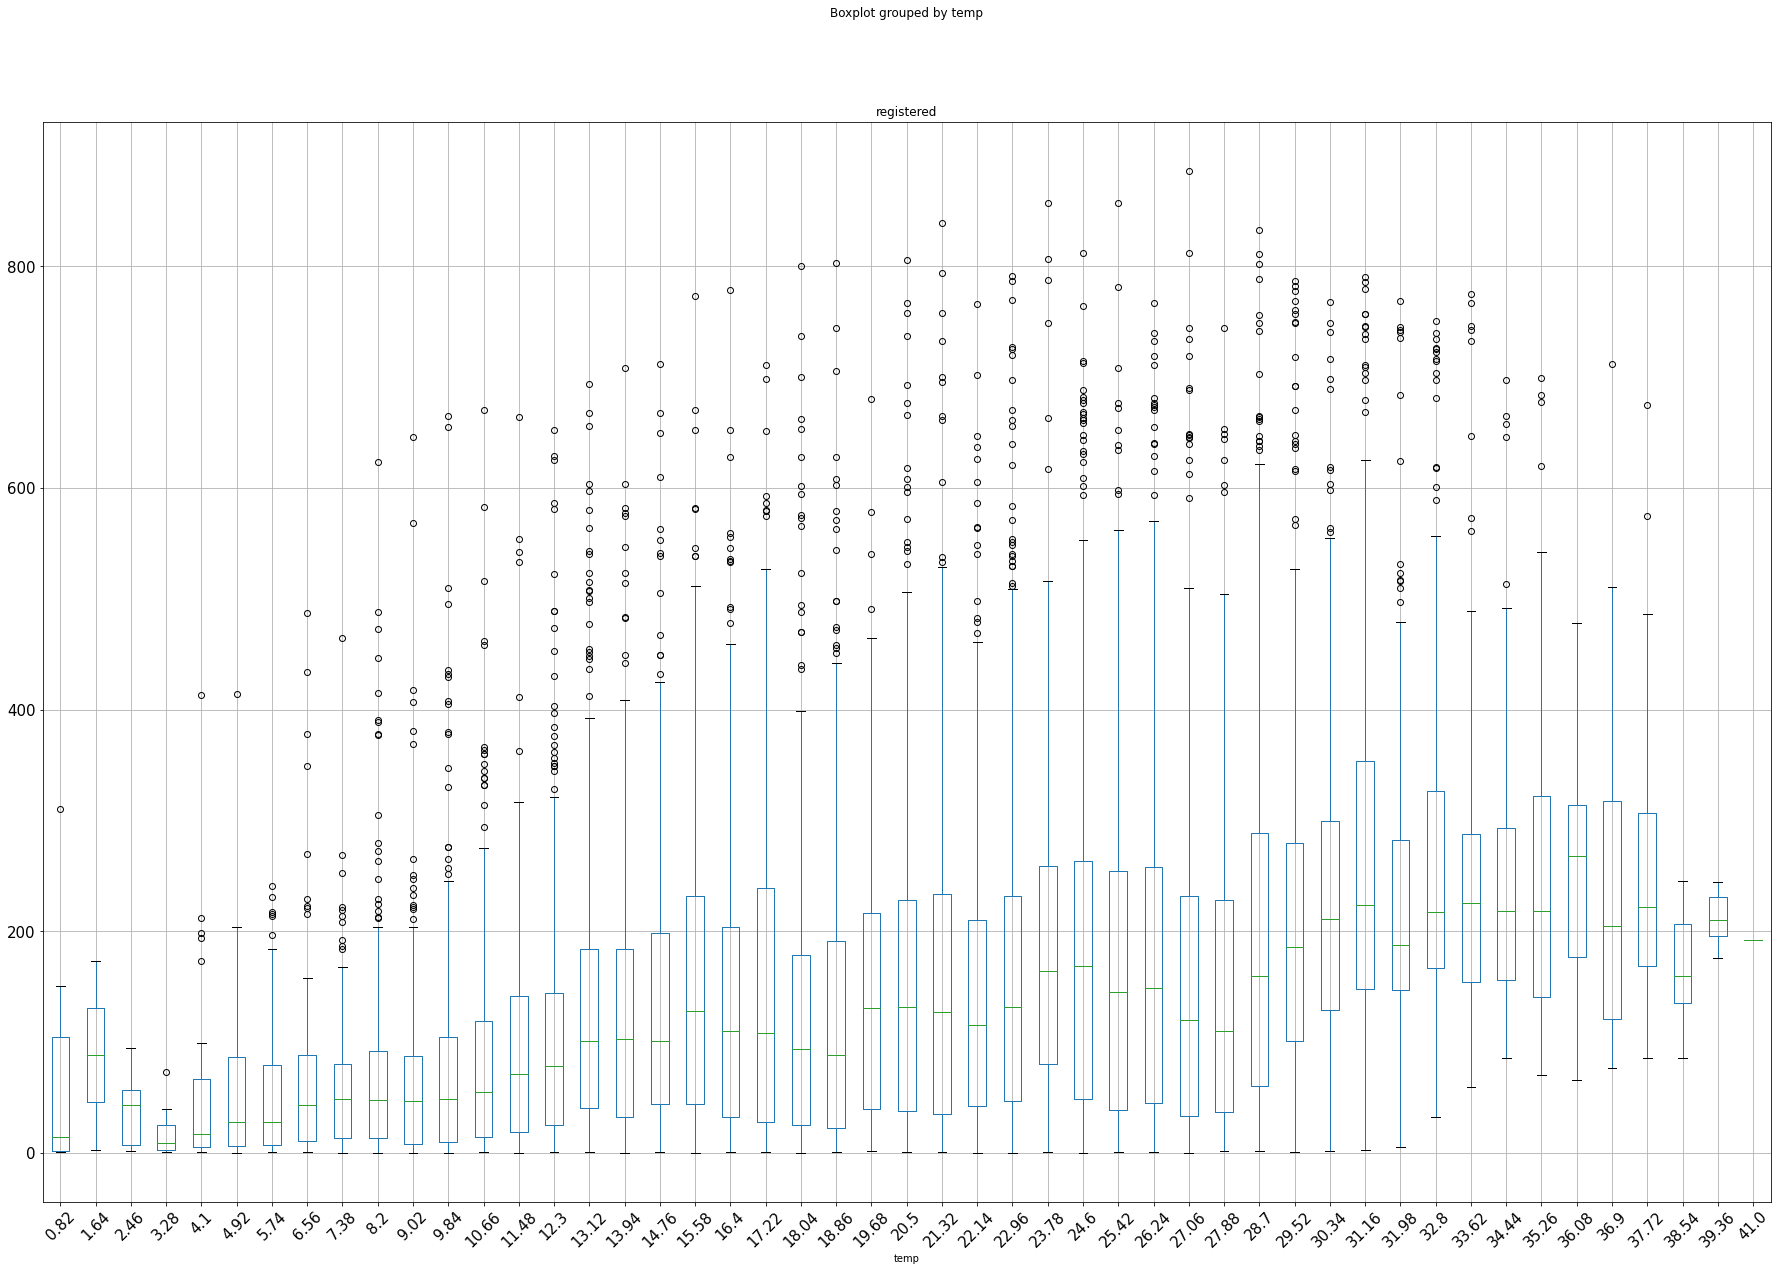

In [57]:
bike.boxplot(column='registered', by='temp',rot=45, fontsize=15, figsize=(30,20))

In [76]:
bike['temp'].shape

(10886,)

In [83]:
unq_temp = (pd.unique(bike['temp']))

In [84]:
unq_temp

array([ 9.84,  9.02,  8.2 , 13.12, 15.58, 14.76, 17.22, 18.86, 18.04,
       16.4 , 13.94, 12.3 , 10.66,  6.56,  5.74,  7.38,  4.92, 11.48,
        4.1 ,  3.28,  2.46, 21.32, 22.96, 23.78, 24.6 , 19.68, 22.14,
       20.5 , 27.06, 26.24, 25.42, 27.88, 28.7 , 30.34, 31.16, 29.52,
       33.62, 35.26, 36.9 , 32.8 , 31.98, 34.44, 36.08, 37.72, 38.54,
        1.64,  0.82, 39.36, 41.  ])

In [98]:
for temp_arr in unq_temp:
    filt =  (bike.temp == temp_arr)
    bike(filt)
    q1 = bike['registered'].quantile(0.25)
    q3 = bike['registered'].quantile(0.75)
    iqr = q3 - q1
    
    low = q1-1.5*iqr
    high = q3+1.5*iqr
    print(temp_arr, q1, q3, iqr)

TypeError: 'DataFrame' object is not callable

In [228]:
 bike_sort = bike[['temp','registered']].sort_values('temp')

In [236]:
bike_sort.value_counts()

temp   registered
10.66  1.00          15
9.02   3.00          13
18.86  3.00          12
8.20   1.00          12
16.40  3.00          12
                     ..
24.60  264.00         1
       265.00         1
       266.00         1
       267.00         1
0.82   0.82           1
Length: 6882, dtype: int64

In [241]:
bike_sort.head(10)

,temp,registered
temp,0.82,0.82
5495,0.82,1.00
5496,0.82,1.00
5497,0.82,2.00
5498,0.82,14.00
5501,0.82,310.00
5500,0.82,151.00
5499,0.82,59.00
5494,1.64,3.00
5502,1.64,173.00


### Remove Outliers for each temperature

In [256]:
prev = 9999
bike_sort_final = pd.DataFrame()
for col in bike_sort['temp']:
    if col != prev:
        prev = col
        filt = bike_sort['temp'] == col
        q1 = bike_sort['registered'][filt].quantile(0.25)
        q3 = bike_sort['registered'][filt].quantile(0.75)
        iqr = q3 - q1
        low = q1-1.5*iqr
        high = q3+1.5*iqr 
        print('temp=', col, 'iqr=', iqr, 'low', low, 'high', high)
    ##filter1 = bike_sort['registered']< high
        test = bike_sort[(bike_sort['temp'] == col) & (bike_sort['registered'] <= high)]
        print(test)
        bike_sort_final = pd.concat((bike_sort_final, test),axis=0)


temp= 0.82 iqr= 81.0 low -120.5 high 203.5
      temp  registered
temp  0.82        0.82
5495  0.82        1.00
5496  0.82        1.00
5497  0.82        2.00
5498  0.82       14.00
5500  0.82      151.00
5499  0.82       59.00
temp= 1.64 iqr= 85.0 low -82.0 high 258.0
      temp  registered
5494  1.64         3.0
5502  1.64       173.0
temp= 2.46 iqr= 50.0 low -68.0 high 132.0
      temp  registered
5503  2.46        57.0
626   2.46        95.0
625   2.46        43.0
624   2.46         7.0
623   2.46         2.0
temp= 3.28 iqr= 22.0 low -30.0 high 58.0
      temp  registered
669   3.28         4.0
6139  3.28        24.0
5493  3.28         9.0
5504  3.28        40.0
6146  3.28        26.0
6145  3.28        18.0
192   3.28         5.0
622   3.28         2.0
190   3.28         1.0
189   3.28         1.0
temp= 4.1 iqr= 61.25 low -86.125 high 158.875
      temp  registered
306    4.1        17.0
6147   4.1        60.0
213    4.1         2.0
214    4.1         3.0
193    4.1        10.0
191 

In [257]:
bike.temp.value_counts()

14.76    467
26.24    453
28.70    427
13.94    413
18.86    406
22.14    403
25.42    403
16.40    400
22.96    395
27.06    394
24.60    390
12.30    385
21.32    362
13.12    356
17.22    356
29.52    353
10.66    332
18.04    328
20.50    327
30.34    299
9.84     294
15.58    255
9.02     248
31.16    242
8.20     229
27.88    224
23.78    203
32.80    202
11.48    181
19.68    170
6.56     146
33.62    130
5.74     107
7.38     106
31.98     98
34.44     80
35.26     76
4.92      60
36.90     46
4.10      44
37.72     34
36.08     23
3.28      11
0.82       8
38.54      7
39.36      6
2.46       5
1.64       2
41.00      1
Name: temp, dtype: int64

In [258]:
bike_sort_final.temp.value_counts()

14.76    454
26.24    437
28.70    410
13.94    401
25.42    393
18.86    389
22.14    388
16.40    388
27.06    379
22.96    371
24.60    369
12.30    362
21.32    351
17.22    348
13.12    334
29.52    333
10.66    315
20.50    311
18.04    310
30.34    287
9.84     276
15.58    247
9.02     233
31.16    227
27.88    217
8.20     210
23.78    197
32.80    187
11.48    175
19.68    166
6.56     137
33.62    122
5.74     101
7.38      96
31.98     85
34.44     75
35.26     72
4.92      59
36.90     45
4.10      39
37.72     32
36.08     23
3.28      10
38.54      7
0.82       7
39.36      6
2.46       5
1.64       2
41.00      1
Name: temp, dtype: int64

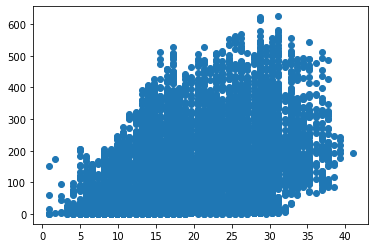

In [259]:
plt.scatter(bike_sort_final['temp'], bike_sort_final['registered'])

In [261]:
model.fit(bike_sort_final[['temp']], bike_sort_final['registered'])

LinearRegression()

In [265]:
m1 = model.coef_

In [264]:
c1 = model.intercept_

In [266]:
print(m1, c1)

[5.80517585] 18.467239259920674


In [267]:
new_predict_reg = model.predict(bike_sort_final[['temp']])

In [269]:
new_actual_reg = (bike_sort_final['registered'])

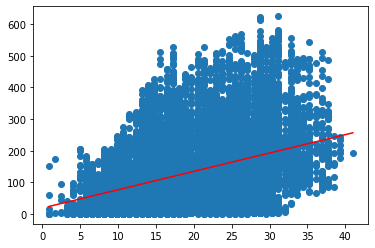

In [270]:
plt.scatter(bike_sort_final['temp'], new_actual_reg)
plt.plot(bike_sort_final['temp'], new_predict_reg, color='r')

In [271]:
mean_squared_error(new_actual_reg, new_predict_reg)

12261.99942082447

In [272]:
r2_score(new_actual_reg, new_predict_reg)

0.1418405829646029